In [1]:
from sensor_core import SensorManager
from sensor_core import strg_manager
from sensor_core import ser_manager
import numpy as np

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

Valid,Device,Type,Backend,Driver
✅ (default),Radeon 8060S Graphics (RADV GFX1151),IntegratedGPU,Vulkan,Mesa 25.2.3-arch1.2
❌,"Radeon 8060S Graphics (radeonsi, gfx1151, LLVM 20.1.8, DRM 3.61, 6.12.48-1-MANJARO)",Unknown,OpenGL,4.6 (Core Profile) Mesa 25.2.3-arch1.2


In [2]:
# USER DEFINED PARAMS
ser_channel_key = ["red", "infrared", "violet"]                    # Names of serial channels
plot_channel_key = [["red", "infrared", "violet"]]                 # Names and gridplot arrangement of plot channels
commport = None                                                    # Name of comm port
baudrate = None                                                    # bits/second
window_size = 1000                                                 # Number of points to acquire before updating plot

In [3]:
# Custom Serial Acquisition Function
def acquire_data(ser, window_size, num_channel):
    """ serial acquisition function handler. All parameters are internally generated
    Must include the following parameters:
    :param ser: serial port
    :param window_size: number of frames to capture before passing to shared memory object. Default 1
    :param num_channel: number of channels to capture. 
    """
    channel_data = np.random.rand(num_channel, window_size)
    return channel_data

In [4]:
# Instantiate Sensor Manager class
sm = SensorManager(ser_channel_key=ser_channel_key,
                   plot_channel_key=plot_channel_key,
                   commport=commport, 
                   baudrate=baudrate, 
                   window_size = window_size,
                   num_points=100,
                   plot_target_fps=30.0,
                   plot_catchup_base_max=4096,
                   plot_catchup_boost=2.5)

In [5]:
# Create 'update process' to handle acquired data
update_process = sm.update_data_process(save_data=False, 
                            filepath='./serial_db.sqlite3',
                            virtual_ser_port = True,
                            func=acquire_data)
# Create 'plot process' to handle plotting. Returns plot object as well
plot_process, plot = sm.setup_plotting_process()

RFBOutputContext()

/home/aju/mabos/lib/python3.13/site-packages/fastplotlib/graphics/features/_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


In [6]:
# Start update process, start plotting process
## Recommended to use in-built start_process function to avoid Windows OS issues
sm.start_process(update_process)
sm.start_process(plot_process)

JupyterRenderCanvas(css_height='300.0px', css_width='500.0px')
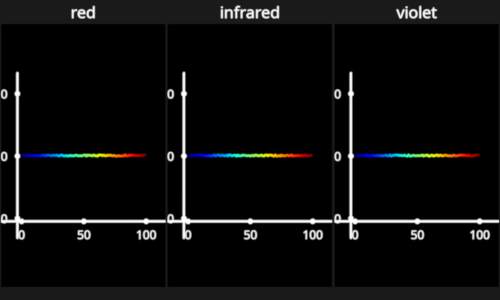

In [7]:
# Show plot
plot.show()

In [36]:
# Get metrics snapshot
sm.get_metrics()

{'writer': {'init': True,
  'producer_fps': 60207.79,
  'consumer_fps': 0.0,
  'publish_avg_ms': 0.001,
  'publish_p95_ms': 0.002,
  'plot_tick_avg_ms': 0.0,
  'plot_tick_p95_ms': 0.0,
  'gpu_upload_avg_ms': 0.0,
  'gpu_upload_p95_ms': 0.0,
  'acquire_avg_ms': 0.012,
  'acquire_p95_ms': 0.012,
  'write_idx': 766881,
  'read_idx': 0,
  'frames_lag': 0,
  'drops_est': 0},
 'plot': {'init': True,
  'producer_fps': 0.0,
  'consumer_fps': 23.46,
  'publish_avg_ms': 0.0,
  'publish_p95_ms': 0.0,
  'plot_tick_avg_ms': 4.078,
  'plot_tick_p95_ms': 6.195,
  'gpu_upload_avg_ms': 0.065,
  'gpu_upload_p95_ms': 0.078,
  'acquire_avg_ms': 0.0,
  'acquire_p95_ms': 0.0,
  'write_idx': 779435,
  'read_idx': 776909,
  'frames_lag': 2526,
  'drops_est': 96454}}